In [412]:
sexo = "F"
faixaDeCep = "0101"
dominioTeste = "S"

# Grafico Comum

In [413]:
import requests

url = 'http://dev.abaccusapi.com.br:8080/app/motor/contexto/1513'
# url = 'http://localhost:8080/app/motor/contexto/1513'
headers = {'Accept': 'application/json', 'Content-type': 'application/json'}

r = requests.post(url, json={'sexo': sexo, 'faixaDeCep': faixaDeCep, 'dominioTeste': dominioTeste}, headers=headers)



In [414]:

cal = []

for i in r.json()['objeto']['tabelas']:
    if i['codigoRetorno'] == 5192:
        for c in i['resultados']:
            cal.append(c['saida'])

print("faixaDeCep: " + cal[0])
print("V1: " + cal[1])
print("V2: " + cal[2])



faixaDeCep: cep
V1: 1.0
V2: 2.0


In [415]:
import requests

url = 'http://dev.abaccusapi.com.br:8080/asset/regra/condicao/5192'

headers = {'Accept': 'application/json', 'Content-type': 'application/json'}

r = requests.get(url, headers=headers)



In [423]:
import pandas as pd
from decimal import Decimal

cal = []
count = 0
exp = []
cep = ''

for i in r.json():
    if i['condicional'] == 'ATRIBUIR':
        for f in i['expressoes']:
            if f['operador'] == 'atribuir':

                exp.append(Decimal(f['constante']))
                count = count + 1

    if count == 3:
        cal.append(exp)
        count = 0
        cep = ''
        exp = []

cal = pd.DataFrame.from_records(cal,columns=['CEP', 'V1', 'V2'])

print(cal)


   CEP V1  V2
0  101  1   5
1  101  2   6
2  202  1   7
3  202  2   8
4  101  1   9
5  101  2  10
6  202  1  11
7  202  2  12


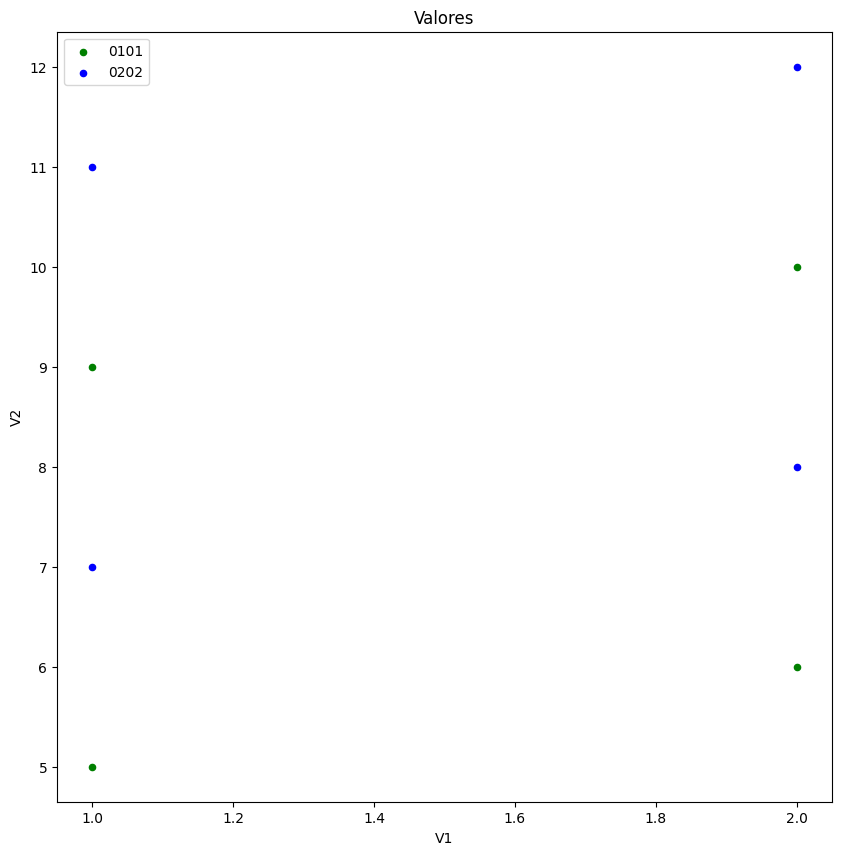

In [424]:
import matplotlib.pyplot as plt

fig = cal[cal.CEP==101].plot(kind='scatter',x='V1',y='V2',color='green', label='0101')
cal[cal.CEP==202].plot(kind='scatter',x='V1',y='V2',color='blue', label='0202',ax=fig)

fig.set_xlabel("V1")
fig.set_ylabel("V2")
fig.set_title("Valores")
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

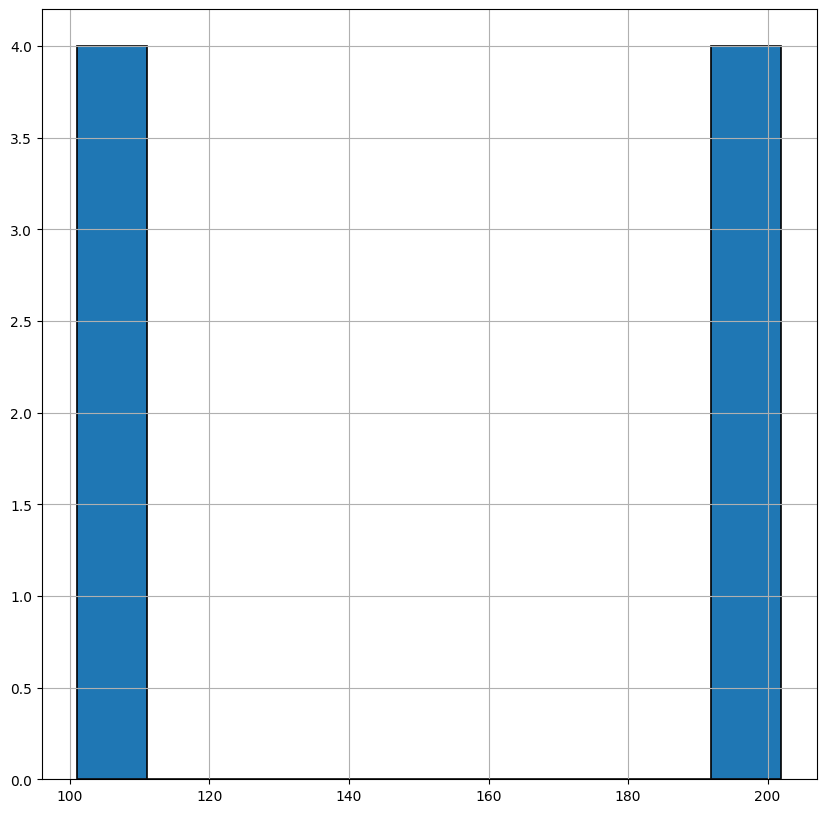

In [425]:
cal.CEP.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()
